# Week4授業前課題2 住宅価格の予測

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./HousePrices.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
drop_df = df
# 半分以上欠損値を含む列を削除する。
drop_df = drop_df.dropna(thresh=df.shape[0]*0.5, axis=1)

# 欠損値があるサンプル（行）は削除する。
drop_df = drop_df.dropna(axis=0) 

## 【問題1】練習のために特徴量の選択

In [4]:
df_data = drop_df.loc[:,["GrLivArea","YearBuilt","SalePrice"]]
df_data

,GrLivArea,YearBuilt,SalePrice
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
6,1694,2004,307000
...,...,...,...
1447,2090,1995,240000
1451,1578,2008,287090
1455,1647,1999,175000
1456,2073,1978,210000


## 【問題2】線形回帰による推定と評価

In [5]:
import numpy as np
# ndarrayへ変換
X = np.array(df_data.iloc[:,0:2])
y = np.array(df_data.iloc[:,2])

In [6]:
X.shape

(583, 2)

In [7]:
y.shape

(583,)

In [8]:
# 訓練データと検証データの分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [9]:
# 標準化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
ss_X_train = ss.transform(X_train)
ss_X_test = ss.transform(X_test)

## 【問題3】手法の比較

### ＜線形回帰＞

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt
%matplotlib inline

### （単回帰）

GrLivArea平均二乗誤差:3738934855.124572
YearBuilt平均二乗誤差:6913093499.281378


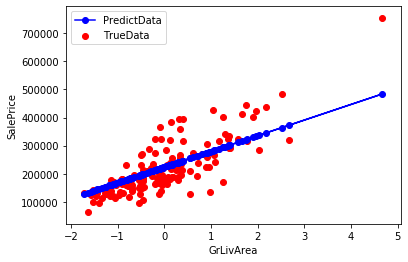

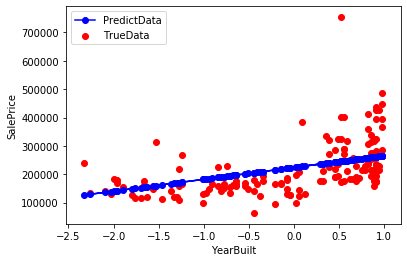

In [11]:
# 線形回帰
model_LR_GrLivArea = LR()
model_LR_YearBuilt = LR()

# 学習
## 重回帰
model_LR_GrLivArea.fit(ss_X_train[:,0].reshape(-1,1), y_train)
model_LR_YearBuilt.fit(ss_X_train[:,1].reshape(-1,1), y_train)

# 推定
y_pred_LR_GrLivArea = model_LR_GrLivArea.predict(ss_X_test[:,0].reshape(-1,1))
y_pred_LR_YearBuilt = model_LR_YearBuilt.predict(ss_X_test[:,1].reshape(-1,1))

# 評価
MSE_LR_GrLivArea = MSE(y_test, y_pred_LR_GrLivArea)
print("GrLivArea平均二乗誤差:{}".format(MSE_LR_GrLivArea))
MSE_LR_YearBuilt = MSE(y_test, y_pred_LR_YearBuilt)
print("YearBuilt平均二乗誤差:{}".format(MSE_LR_YearBuilt))

plt.plot(ss_X_test[:,0], y_pred_LR_GrLivArea, color="blue",label = "PredictData", marker="o")
plt.scatter(ss_X_test[:,0], y_test, color="red",label = "TrueData")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.legend()
plt.show()

plt.plot(ss_X_test[:,1], y_pred_LR_YearBuilt, color="blue",label = "PredictData", marker="o")
plt.scatter(ss_X_test[:,1], y_test, color="red",label = "TrueData")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.legend()
plt.show()

### （重回帰）

平均二乗誤差:2591697601.1637993


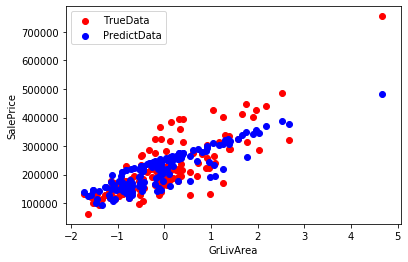

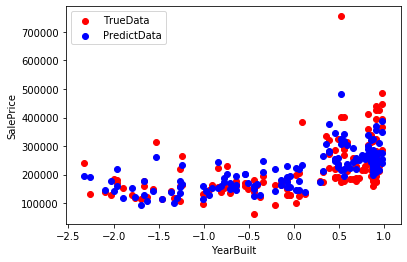

In [12]:
# 線形回帰
import numpy as np
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt
%matplotlib inline

model_LR = LR()

# 学習
model_LR.fit(ss_X_train, y_train)

# 推定
y_pred_LR = model_LR.predict(ss_X_test)

# 評価
MSE_LR = MSE(y_test, y_pred_LR)
print("平均二乗誤差:{}".format(MSE_LR))

plt.scatter(ss_X_test[:,0], y_test, color="red",label = "TrueData")
plt.scatter(ss_X_test[:,0], y_pred_LR, color="blue",label = "PredictData")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.legend()
plt.show()

plt.scatter(ss_X_test[:,1], y_test, color="red",label = "TrueData")
plt.scatter(ss_X_test[:,1], y_pred_LR, color="blue",label = "PredictData")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.legend()
plt.show()

### ＜SVM＞

In [13]:
from sklearn.svm import SVR

### （単回帰）

GrLivArea平均二乗誤差:9731754014.392286
YearBuilt平均二乗誤差:9732323731.892723


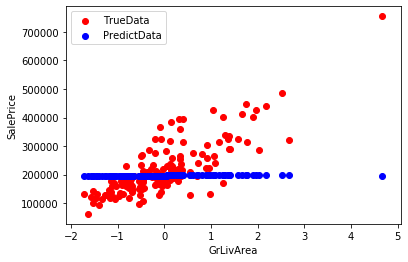

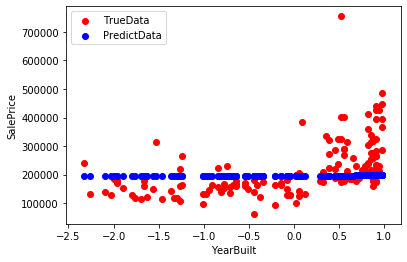

In [14]:
# SVM
model_SVR_GrLivArea = SVR()
model_SVR_YearBuilt = SVR()

# 学習
model_SVR_GrLivArea.fit(ss_X_train[:,0].reshape(-1,1), y_train)
model_SVR_YearBuilt.fit(ss_X_train[:,1].reshape(-1,1), y_train)

# 推定
y_pred_SVR_GrLivArea = model_SVR_GrLivArea.predict(ss_X_test[:,0].reshape(-1,1))
y_pred_SVR_YearBuilt = model_SVR_YearBuilt.predict(ss_X_test[:,1].reshape(-1,1))

# 評価
MSE_SVM_GrLivArea = MSE(y_test, y_pred_SVR_GrLivArea)
print("GrLivArea平均二乗誤差:{}".format(MSE_SVM_GrLivArea))
MSE_SVM_YearBuilt = MSE(y_test, y_pred_SVR_YearBuilt)
print("YearBuilt平均二乗誤差:{}".format(MSE_SVM_YearBuilt))

plt.scatter(ss_X_test[:,0], y_test, color="red",label = "TrueData")
plt.scatter(ss_X_test[:,0], y_pred_SVR_GrLivArea, color="blue",label = "PredictData")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.legend()
plt.show()

plt.scatter(ss_X_test[:,1], y_test, color="red",label = "TrueData")
plt.scatter(ss_X_test[:,1], y_pred_SVR_YearBuilt, color="blue",label = "PredictData")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.legend()
plt.show()

### （重回帰）

In [15]:
from sklearn.tree import DecisionTreeRegressor as DTR

平均二乗誤差:9729366834.053614


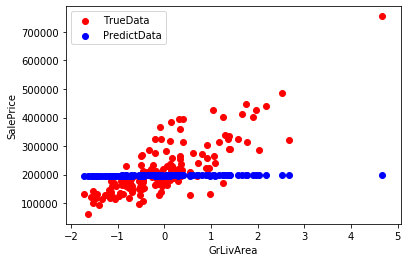

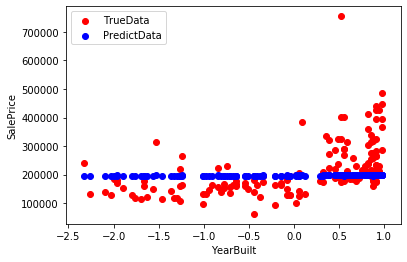

In [16]:
# SVM
#model_SVR = SVR(C=100000)
model_SVR = SVR()

# 学習
model_SVR.fit(ss_X_train, y_train)

# 推定
y_pred_SVR = model_SVR.predict(ss_X_test)

# 評価
MSE_SVM = MSE(y_test, y_pred_SVR)
print("平均二乗誤差:{}".format(MSE_SVM))


plt.scatter(ss_X_test[:,0], y_test, color="red",label = "TrueData")
plt.scatter(ss_X_test[:,0], y_pred_SVR, color="blue",label = "PredictData")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.legend()
plt.show()


plt.scatter(ss_X_test[:,1], y_test, color="red",label = "TrueData")
plt.scatter(ss_X_test[:,1], y_pred_SVR, color="blue",label = "PredictData")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.legend()
plt.show()

### ＜決定木＞

In [17]:
from sklearn.tree import DecisionTreeRegressor

### （単回帰）

GrLivArea平均二乗誤差:8070679077.095699
YearBuilt平均二乗誤差:6190315279.9734955


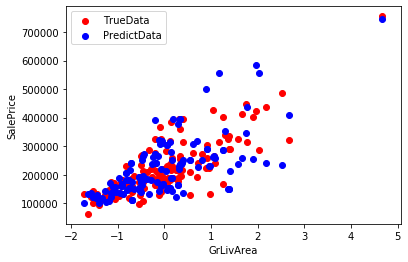

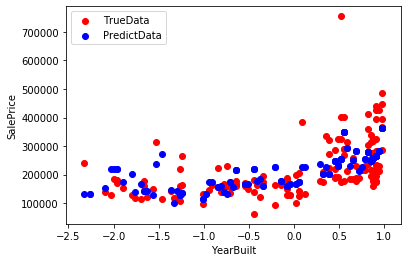

In [18]:
# 決定木
model_DTR_GrLivArea = DTR()
model_DTR_YearBuilt = DTR()

# 学習
model_DTR_GrLivArea.fit(ss_X_train[:,0].reshape(-1,1), y_train)
model_DTR_YearBuilt.fit(ss_X_train[:,1].reshape(-1,1), y_train)

# 推定
y_pred_DTR_GrLivArea = model_DTR_GrLivArea.predict(ss_X_test[:,0].reshape(-1,1))
y_pred_DTR_YearBuilt = model_DTR_YearBuilt.predict(ss_X_test[:,1].reshape(-1,1))

# 評価
MSE_DTR_GrLivArea = MSE(y_test, y_pred_DTR_GrLivArea)
print("GrLivArea平均二乗誤差:{}".format(MSE_DTR_GrLivArea))
MSE_DTR_YearBuilt = MSE(y_test, y_pred_DTR_YearBuilt)
print("YearBuilt平均二乗誤差:{}".format(MSE_DTR_YearBuilt))

plt.scatter(ss_X_test[:,0], y_test, color="red",label = "TrueData")
plt.scatter(ss_X_test[:,0], y_pred_DTR_GrLivArea, color="blue",label = "PredictData")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.legend()
plt.show()

plt.scatter(ss_X_test[:,1], y_test, color="red",label = "TrueData")
plt.scatter(ss_X_test[:,1], y_pred_DTR_YearBuilt, color="blue",label = "PredictData")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.legend()
plt.show()

### （重回帰）

平均二乗誤差:3667476649.0753427


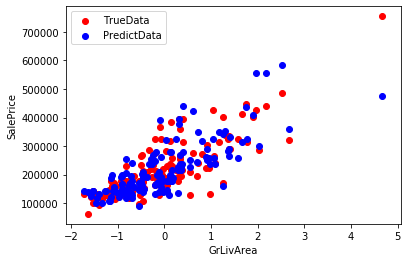

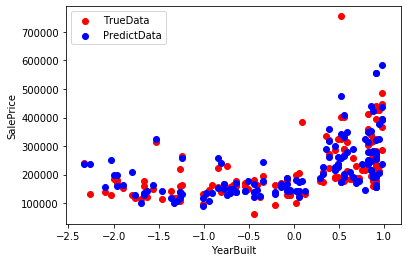

In [19]:
# 決定木
model_DTR = DTR()

# 学習
clf = model_DTR.fit(ss_X_train, y_train)

# 推定
y_pred_DTR = model_DTR.predict(ss_X_test)


# 評価
#cr_LR = classification_report(y_test, y_pred_LR, output_dict=True)
MSE_DTR = MSE(y_test, y_pred_DTR)
print("平均二乗誤差:{}".format(MSE_DTR))

plt.scatter(ss_X_test[:,0], y_test, color="red",label = "TrueData")
plt.scatter(ss_X_test[:,0], y_pred_DTR, color="blue",label = "PredictData")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.legend()
plt.show()

plt.scatter(ss_X_test[:,1], y_test, color="red",label = "TrueData")
plt.scatter(ss_X_test[:,1], y_pred_DTR, color="blue",label = "PredictData")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.legend()
plt.show()

### ＜ランダムフォレスト＞

In [20]:
from sklearn.ensemble import RandomForestRegressor as RFR

### （単回帰）

GrLivArea平均二乗誤差:5641930409.010277
YearBuilt平均二乗誤差:6228197499.513165


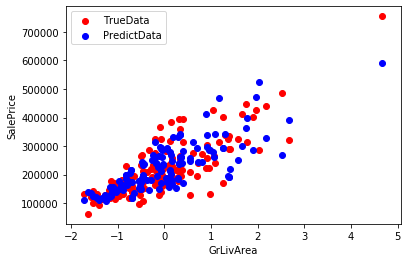

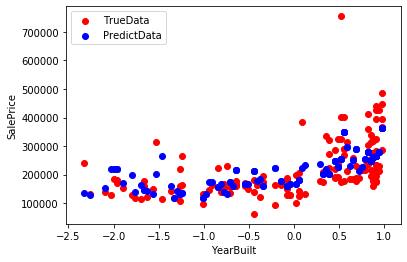

In [21]:


# ランダムフォレスト
model_RFR_GrLivArea = RFR()
model_RFR_YearBuilt = RFR()

# 学習
model_RFR_GrLivArea.fit(ss_X_train[:,0].reshape(-1,1), y_train)
model_RFR_YearBuilt.fit(ss_X_train[:,1].reshape(-1,1), y_train)

# 推定
y_pred_RFR_GrLivArea = model_RFR_GrLivArea.predict(ss_X_test[:,0].reshape(-1,1))
y_pred_RFR_YearBuilt = model_RFR_YearBuilt.predict(ss_X_test[:,1].reshape(-1,1))

# 評価
MSE_RFR_GrLivArea = MSE(y_test, y_pred_RFR_GrLivArea)
print("GrLivArea平均二乗誤差:{}".format(MSE_RFR_GrLivArea))
MSE_RFR_YearBuilt = MSE(y_test, y_pred_RFR_YearBuilt)
print("YearBuilt平均二乗誤差:{}".format(MSE_RFR_YearBuilt))

plt.scatter(ss_X_test[:,0], y_test, color="red",label = "TrueData")
plt.scatter(ss_X_test[:,0], y_pred_RFR_GrLivArea, color="blue",label = "PredictData")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.legend()
plt.show()

plt.scatter(ss_X_test[:,1], y_test, color="red",label = "TrueData")
plt.scatter(ss_X_test[:,1], y_pred_RFR_YearBuilt, color="blue",label = "PredictData")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.legend()
plt.show()

### （重回帰）

平均二乗誤差:2190037189.9297385


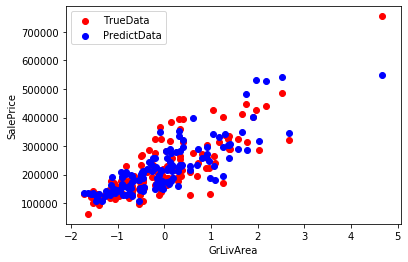

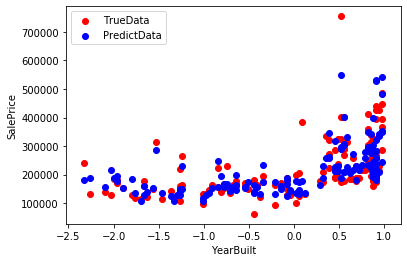

In [22]:
# ランダムフォレスト
model_RFR = RFR()
# 学習
clf = model_RFR.fit(ss_X_train, y_train)

# 推定
y_pred_RFR = model_RFR.predict(ss_X_test)

# 評価
MSE_RFR = MSE(y_test, y_pred_RFR)
print("平均二乗誤差:{}".format(MSE_RFR))

plt.scatter(ss_X_test[:,0], y_test, color="red",label = "TrueData")
plt.scatter(ss_X_test[:,0], y_pred_RFR, color="blue",label = "PredictData")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.legend()
plt.show()

plt.scatter(ss_X_test[:,1], y_test, color="red",label = "TrueData")
plt.scatter(ss_X_test[:,1], y_pred_RFR, color="blue",label = "PredictData")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.legend()
plt.show()

【考察】
各手法での平均二乗誤差をまとめると、

|                    |平均二乗誤差 (MSE) |               | 二乗平均平方根誤差(RMSE) |           |
|--------------------|---------------|--------------------------|-----------|-----------|
|                    | GrLivArea     | YearBuilt                | GrLivArea | YearBuilt |
| 線形回帰           | 1,986,671,129 | 3,058,792,490            | 44,572    | 55,306    |
| SVM                | 5,909,872,885 | 5,921,047,757            | 76,876    | 76,948    |
| 決定木             | 1,708,985,741 | 2,720,432,964            | 41,340    | 52,158    |
| ランダムフォレスト | 1,721,185,674 | 2,718,803,562            | 41,487    | 52,142    |

平均二乗誤差が小さいものから並べると決定木＜ランダムフォレスト＜線形回帰＜SVMの順で、決定木が一番小さい。  
SVM以外は目的変数のプロットに近い領域に推定データがプロットされている。  
単回帰では、説明変数の各値に対する目的変数の範囲内で直線でプロットできるような値で学習される。  
重回帰では、説明変数が２つ以上となるので、1つの特徴量では1点に推定することができず、ある範囲をとる。

## 【問題4】（アドバンス課題）他の特徴量も使用しての学習

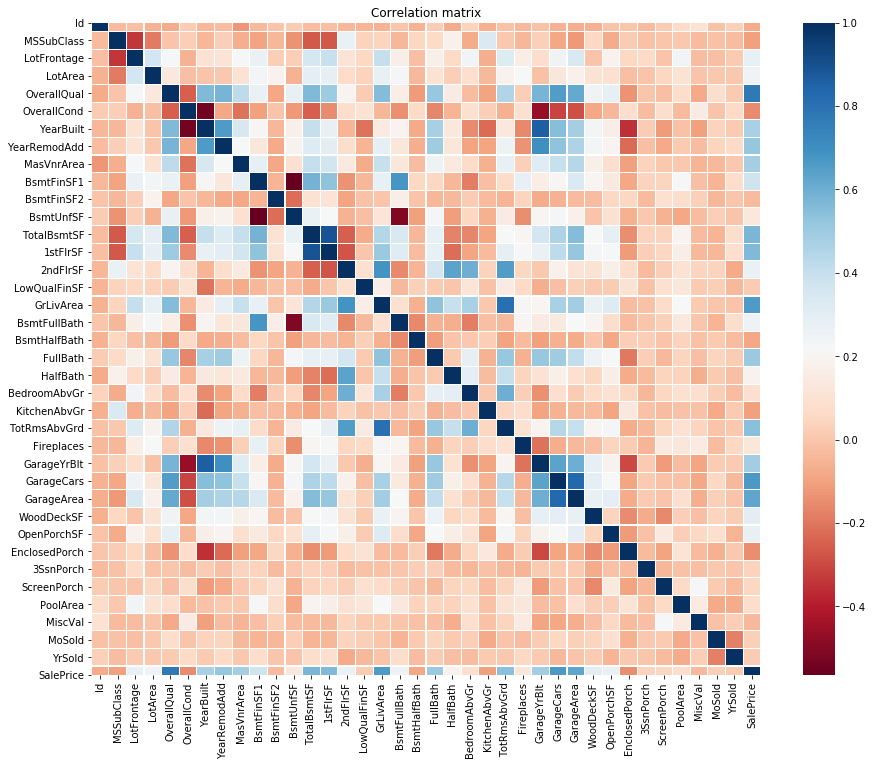

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# 相関係数行列のヒートマップを作る

df_corr = drop_df.corr()

colormap = plt.cm.RdBu
plt.subplots(figsize=(15, 12))
plt.title('Correlation matrix')
sns.heatmap(df_corr,linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=False)
plt.show()

### 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。

In [24]:
# SalePriceとの相関をソート
df_corr_saleprice  = df_corr["SalePrice"].sort_values(ascending=False)
print(df_corr_saleprice[0:11])

SalePrice       1.000000
OverallQual     0.776329
GarageCars      0.667489
GrLivArea       0.662289
GarageArea      0.632144
TotalBsmtSF     0.574926
1stFlrSF        0.560903
TotRmsAbvGrd    0.547225
YearRemodAdd    0.519747
FullBath        0.508674
GarageYrBlt     0.488018
Name: SalePrice, dtype: float64


,SalePrice,OverallQual,GarageCars,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,YearRemodAdd,FullBath,GarageYrBlt
0,208500,7,2,1710,548,856,856,8,2003,2,2003.0
1,181500,6,2,1262,460,1262,1262,6,1976,2,1976.0
2,223500,7,2,1786,608,920,920,6,2002,2,2001.0
3,140000,7,3,1717,642,756,961,7,1970,1,1998.0
4,250000,8,3,2198,836,1145,1145,9,2000,2,2000.0


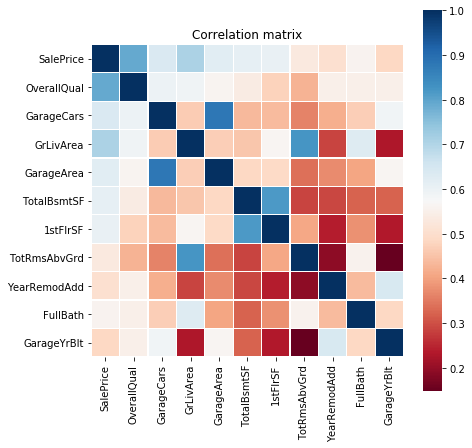

In [25]:
df_high_corr_saleprice = df[df_corr_saleprice[0:11].index]
display(df_high_corr_saleprice.head())

df_high_corr_saleprice_corr = df_high_corr_saleprice.corr()

colormap = plt.cm.RdBu
plt.subplots(figsize=(7, 7))
plt.title('Correlation matrix')
sns.heatmap(df_high_corr_saleprice_corr,linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=False)
plt.ylim(df_high_corr_saleprice_corr.shape[0], 0,)
plt.show()

In [26]:
df_high_corr_saleprice = df_high_corr_saleprice.dropna(how='any')

In [27]:
import numpy as np
# ndarrayへ変換
X = np.array(df_high_corr_saleprice.iloc[:,1:])
y = np.array(df_high_corr_saleprice.iloc[:,0])

In [28]:
# 訓練データと検証データの分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [29]:
# 標準化
ss = StandardScaler()
ss.fit(X_train)
ss_X_train = ss.transform(X_train)
ss_X_test = ss.transform(X_test)

以降　重回帰で計算する。

### ＜線形回帰＞（重回帰）

In [30]:
# 線形回帰
model_LR = LR()

# 学習
model_LR.fit(ss_X_train, y_train)

# 推定
y_pred_LR = model_LR.predict(ss_X_test)

# 評価
MSE_LR = MSE(y_test, y_pred_LR)
print("平均二乗誤差:{}".format(MSE_LR))

平均二乗誤差:1176124373.932213


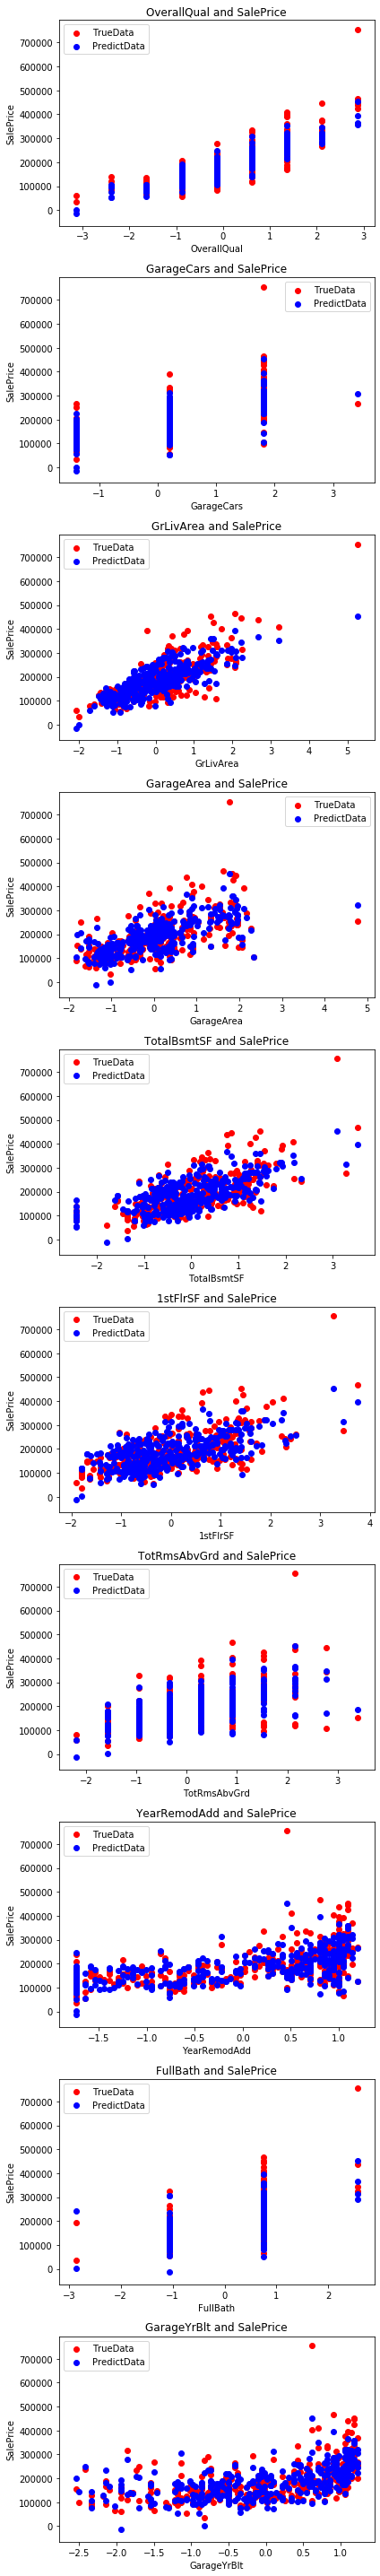

In [31]:
# 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
fig, axes = plt.subplots(10, figsize=(6,40), tight_layout = True) # subplotsを使うと複数のグラフをまとめられる
for i in range(len(df_corr_saleprice[1:11].index)):
    axes[i].set_title(df_corr_saleprice[1:11].index[i]+' and '+ df_corr_saleprice[0:11].index[0])
    axes[i].set(xlabel=df_corr_saleprice[1:11].index[i], ylabel=df_corr_saleprice[0:11].index[0])
    axes[i].scatter(ss_X_test[:,i], y_test, c = 'red',label = "TrueData")
    axes[i].scatter(ss_X_test[:,i], y_pred_LR, c = 'blue', label = "PredictData")
    axes[i].legend()
plt.show()

### ＜SVM＞（重回帰）

In [32]:
# SVM
#model_SVR = SVR(C=100000)
model_SVR = SVR()

# 学習
model_SVR.fit(ss_X_train, y_train)

# 推定
y_pred_SVR = model_SVR.predict(ss_X_test)

# 評価
MSE_SVM = MSE(y_test, y_pred_SVR)
print("平均二乗誤差:{}".format(MSE_SVM))


平均二乗誤差:6778253480.53315


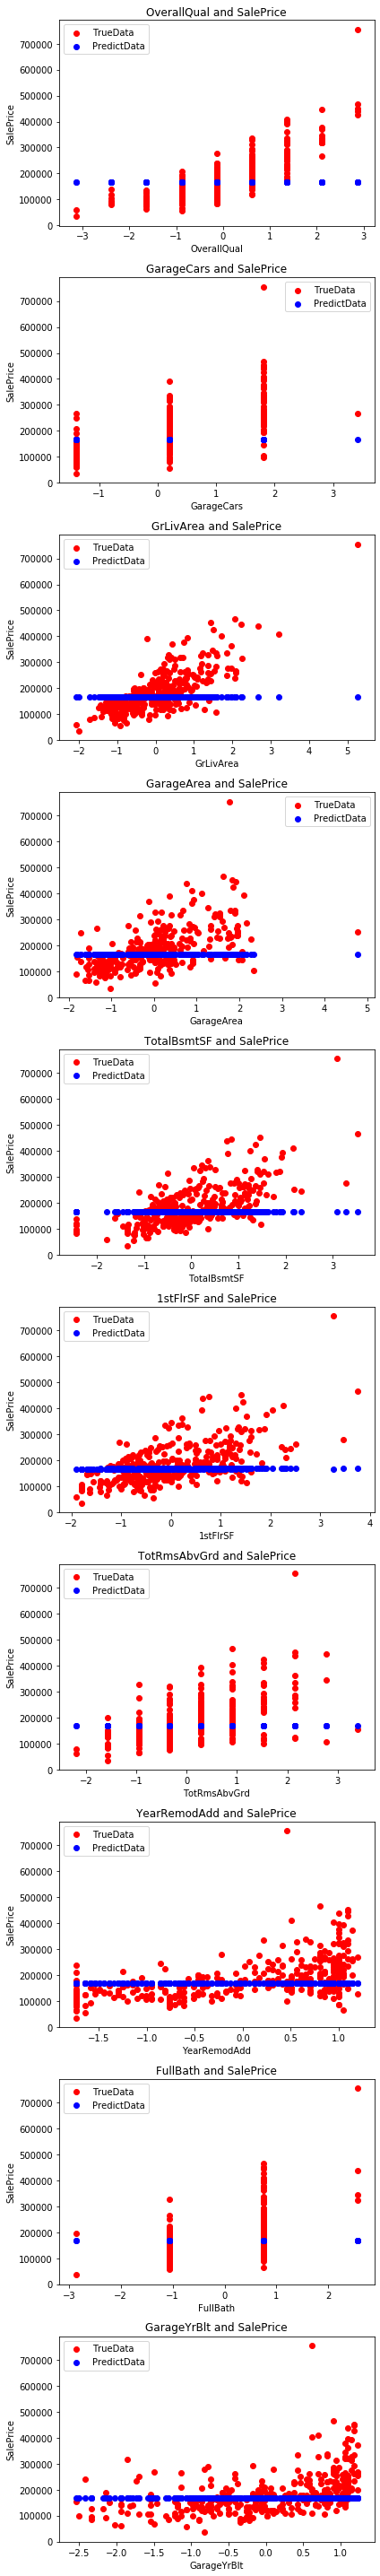

In [33]:
# 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
fig, axes = plt.subplots(10, figsize=(6,40), tight_layout = True) # subplotsを使うと複数のグラフをまとめられる
for i in range(len(df_corr_saleprice[1:11].index)):
    axes[i].set_title(df_corr_saleprice[1:11].index[i]+' and '+ df_corr_saleprice[0:11].index[0])
    axes[i].set(xlabel=df_corr_saleprice[1:11].index[i], ylabel=df_corr_saleprice[0:11].index[0])
    axes[i].scatter(ss_X_test[:,i], y_test, c = 'red',label = "TrueData")
    axes[i].scatter(ss_X_test[:,i], y_pred_SVR, c = 'blue', label = "PredictData")
    axes[i].legend()
plt.show()

### ＜決定木＞（重回帰）

In [34]:
# 決定木
model_DTR = DTR()

# 学習
clf = model_DTR.fit(ss_X_train, y_train)

# 推定
y_pred_DTR = model_DTR.predict(ss_X_test)

# 評価
#cr_LR = classification_report(y_test, y_pred_LR, output_dict=True)
MSE_DTR = MSE(y_test, y_pred_DTR)
print("平均二乗誤差:{}".format(MSE_DTR))


平均二乗誤差:1743565729.4550724


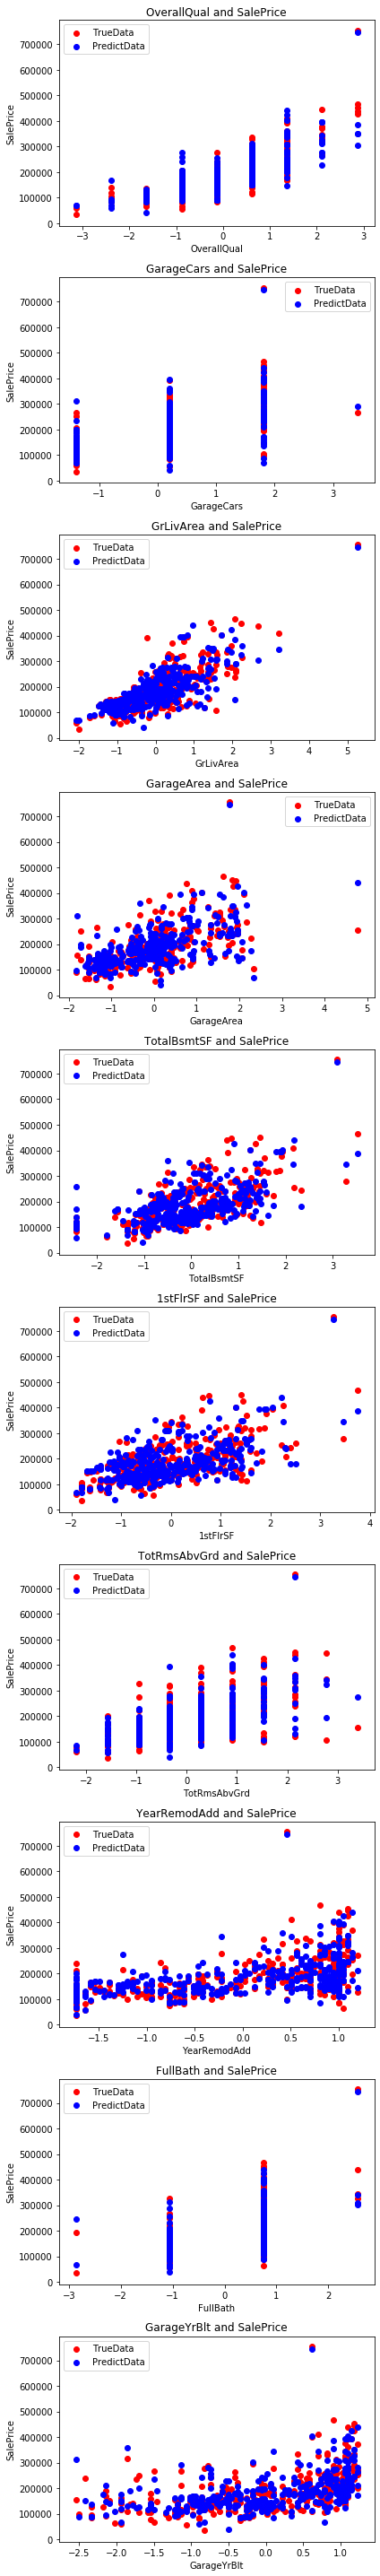

In [35]:
# 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
fig, axes = plt.subplots(10, figsize=(6,40), tight_layout = True) # subplotsを使うと複数のグラフをまとめられる
for i in range(len(df_corr_saleprice[1:11].index)):
    axes[i].set_title(df_corr_saleprice[1:11].index[i]+' and '+ df_corr_saleprice[0:11].index[0])
    axes[i].set(xlabel=df_corr_saleprice[1:11].index[i], ylabel=df_corr_saleprice[0:11].index[0])
    axes[i].scatter(ss_X_test[:,i], y_test, c = 'red',label = "TrueData")
    axes[i].scatter(ss_X_test[:,i], y_pred_DTR, c = 'blue', label = "PredictData")
    axes[i].legend()
plt.show()

### ＜ランダムフォレスト＞（重回帰）

In [36]:
# ランダムフォレスト
model_RFR = RFR()
# 学習
clf = model_RFR.fit(ss_X_train, y_train)

# 推定
y_pred_RFR = model_RFR.predict(ss_X_test)

# 評価
MSE_RFR = MSE(y_test, y_pred_RFR)
print("平均二乗誤差:{}".format(MSE_RFR))

平均二乗誤差:908464705.9897139


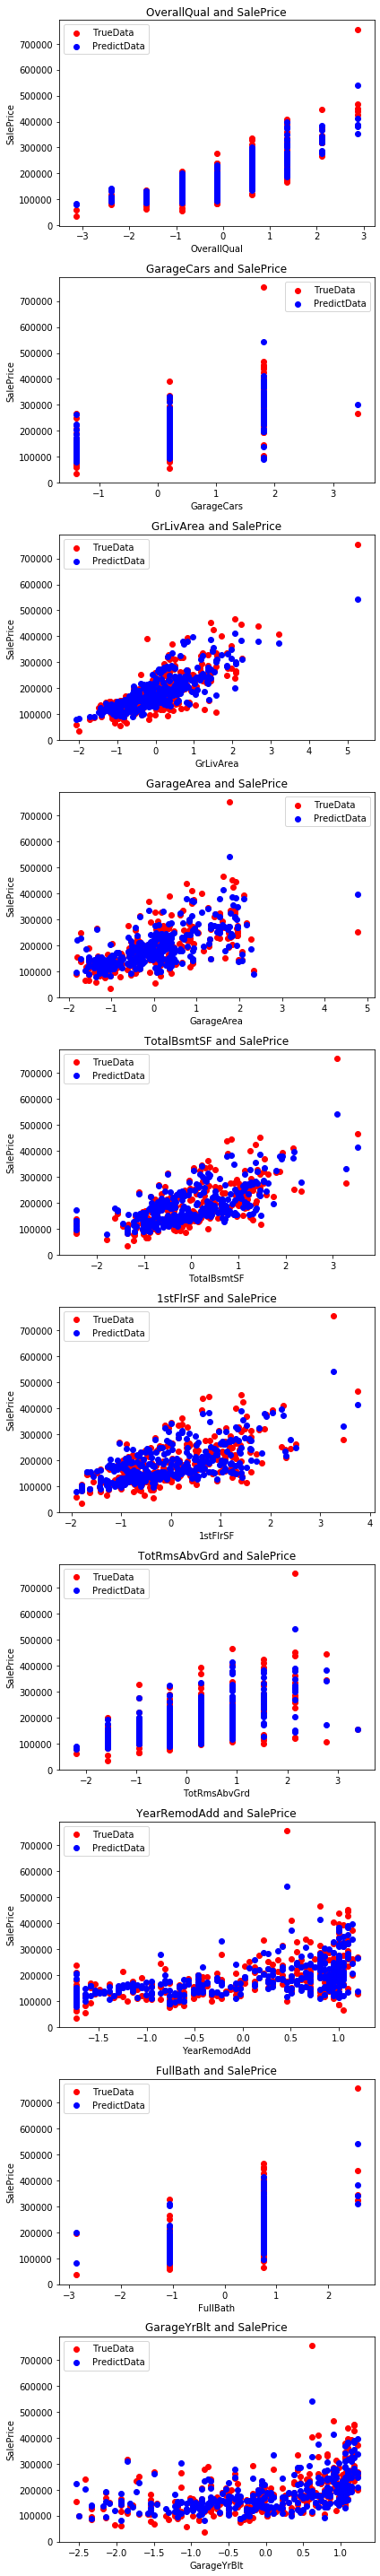

In [37]:
# 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
fig, axes = plt.subplots(10, figsize=(6,40), tight_layout = True) # subplotsを使うと複数のグラフをまとめられる
for i in range(len(df_corr_saleprice[1:11].index)):
    axes[i].set_title(df_corr_saleprice[1:11].index[i]+' and '+ df_corr_saleprice[0:11].index[0])
    axes[i].set(xlabel=df_corr_saleprice[1:11].index[i], ylabel=df_corr_saleprice[0:11].index[0])
    axes[i].scatter(ss_X_test[:,i], y_test, c = 'red',label = "TrueData")
    axes[i].scatter(ss_X_test[:,i], y_pred_RFR, c = 'blue', label = "PredictData")
    axes[i].legend()
plt.show()

以上の結果をまとめると  

|                    |平均二乗誤差 (MSE) | 二乗平均平方根誤差(RMSE) |
|--------------------|--------------------------|--------|
| 線形回帰           | 1,056,569,589            | 32,505 |
| SVM                | 5,918,117,548            | 76,929 |
| 決定木             | 1,638,186,924            | 40,475 |
| ランダムフォレスト | 924,636,374              | 30,408 |

となり、ランダムフォレストが一番誤差が小さい。  
プロットの方を見てみると、ランダムフォレストが一番 目的変数の範囲内に収まっている。  
特徴量が２つの時と比べて、特徴量が１０個に増えると、学習の精度が向上しているのが見てとれる。